In [33]:
from guidedstats import GuidedStats
import pandas as pd

df = pd.read_csv("TeachingRatings.csv")
a = GuidedStats(df)

In [34]:
import numpy as np
def outlier(X, Y = None, *args, **kwargs):
    X = X.to_numpy().reshape((-1))
    previousX = kwargs.get("previousX", None)
    if previousX is not None:
        previousX = previousX.to_numpy().reshape((-1))
        Q1 = np.percentile(previousX, 25)
        Q3 = np.percentile(previousX, 75)
        IQR = Q3 - Q1
    else:
        Q1 = np.percentile(X, 25)
        Q3 = np.percentile(X, 75)
        IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    count = 0
    for item in X:
        if item < lower_threshold or item > upper_threshold:
            count += 1
    print(count)
for col in df:
    if str(df[col].dtype) in ('float64','int64'):
        print(col)
        outlier(df[col])

age
0
beauty
0
eval
3
students
42
allstudents
50
prof
0


In [5]:
df["gender"],_ = pd.factorize(df["gender"])
df["ethnicity"],_ = pd.factorize(df["ethnicity"])
df["fcollege"],_ = pd.factorize(df["fcollege"])
df["mcollege"],_ = pd.factorize(df["mcollege"])
df["home"],_ = pd.factorize(df["home"])
df["urban"],_ = pd.factorize(df["urban"])
df["income"],_ = pd.factorize(df["income"])
df["region"],_ = pd.factorize(df["region"])

In [6]:
a

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [23]:
from guidedstats import GuidedStats
import pandas as pd

df = pd.read_csv("housing.csv")
df = df.dropna()

b = GuidedStats(df)
b

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [17]:
import numpy as np
def outlier(X, Y = None, *args, **kwargs):
    X = X.to_numpy().reshape((-1))
    previousX = kwargs.get("previousX", None)
    if previousX is not None:
        previousX = previousX.to_numpy().reshape((-1))
        Q1 = np.percentile(previousX, 25)
        Q3 = np.percentile(previousX, 75)
        IQR = Q3 - Q1
    else:
        Q1 = np.percentile(X, 25)
        Q3 = np.percentile(X, 75)
        IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    count = 0
    for item in X:
        if item < lower_threshold or item > upper_threshold:
            count += 1
    print(count)
for col in df:
    if str(df[col].dtype) in ('float64','int64'):
        print(col)
        outlier(df[col])

longitude
0
latitude
0
housing_median_age
0
total_rooms
1287
total_bedrooms
0
population
1196
households
1220
median_income
681
median_house_value
1071


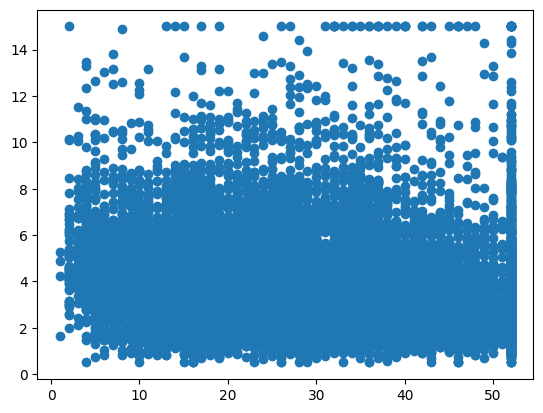

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df["housing_median_age"],df["median_income"])

In [23]:
import pandas as pd

df = pd.read_csv("CASchools.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district     420 non-null    int64  
 1   school       420 non-null    object 
 2   county       420 non-null    object 
 3   grades       420 non-null    object 
 4   students     420 non-null    int64  
 5   teachers     420 non-null    float64
 6   calworks     420 non-null    float64
 7   lunch        420 non-null    float64
 8   computer     420 non-null    int64  
 9   expenditure  420 non-null    float64
 10  income       420 non-null    float64
 11  english      420 non-null    float64
 12  read         420 non-null    float64
 13  math         420 non-null    float64
dtypes: float64(8), int64(3), object(3)
memory usage: 46.1+ KB


In [9]:
df.describe()

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,67472.809524,2628.792857,129.067376,13.246042,44.705237,303.383333,5312.407541,15.316588,15.768155,654.970477,653.342619
std,3466.994655,3913.104985,187.912679,11.454821,27.123381,441.341298,633.937053,7.225890,18.285927,20.107980,18.754202
min,61382.000000,81.000000,4.850000,0.000000,0.000000,0.000000,3926.069580,5.335000,0.000000,604.500000,605.400024
25%,64307.750000,379.000000,19.662499,4.395375,23.282200,46.000000,4906.180053,10.639000,1.940807,640.400024,639.375015
50%,67760.500000,950.500000,48.564999,10.520450,41.750700,117.500000,5214.516601,13.727800,8.777634,655.750000,652.449982
75%,70419.000000,3008.000000,146.350002,18.981350,66.864725,375.250000,5601.401367,17.629001,22.970003,668.725006,665.849991
max,75440.000000,27176.000000,1429.000000,78.994202,100.000000,3324.000000,7711.506836,55.327999,85.539719,704.000000,709.500000


In [3]:
df["score"] = (df["read"]+df["math"])/2

In [17]:
import statsmodels.api as sm
X = sm.add_constant(df[["teachers","expenditure","income","english"]])
Y = df["score"]
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     251.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.16e-109
Time:                        04:46:57   Log-Likelihood:                -1575.0
No. Observations:                 420   AIC:                             3160.
Df Residuals:                     415   BIC:                             3180.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         642.4806      4.367    147.128      

In [46]:
df["STR"] = df["students"]/df["teachers"]
X = sm.add_constant(df[["income","english"]])
Y = df["score"]
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     503.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          6.30e-112
Time:                        05:25:16   Log-Likelihood:                -1575.4
No. Observations:                 420   AIC:                             3157.
Df Residuals:                     417   BIC:                             3169.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        638.9260      1.430    446.762      0.0

In [38]:
from guidedstats import GuidedStats
import pandas as pd

df = pd.read_csv("CASchools.csv")
a = GuidedStats(df)

In [39]:
df["score"] = (df["read"]+df["math"])/2
df["STR"] = df["students"]/df["teachers"]
df["CR"] = df["computer"]/df["students"]

In [40]:
import numpy as np
def outlier(X, Y = None, *args, **kwargs):
    X = X.to_numpy().reshape((-1))
    previousX = kwargs.get("previousX", None)
    if previousX is not None:
        previousX = previousX.to_numpy().reshape((-1))
        Q1 = np.percentile(previousX, 25)
        Q3 = np.percentile(previousX, 75)
        IQR = Q3 - Q1
    else:
        Q1 = np.percentile(X, 25)
        Q3 = np.percentile(X, 75)
        IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    count = 0
    for item in X:
        if item < lower_threshold or item > upper_threshold:
            count += 1
    print(count)
for col in df:
    if str(df[col].dtype) in ('float64','int64'):
        print(col)
        outlier(df[col])

district
0
students
44
teachers
41
calworks
11
lunch
0
computer
38
expenditure
18
income
23
english
20
read
0
math
2
score
1
STR
11
CR
16


In [9]:
a

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [16]:
model1 = a.export("model")
model1.fittedModel.params

const      640.315498
income       1.494517
english     -0.488267
STR         -0.068775
dtype: float64

In [17]:
model2 = a.export("model")
model2.fittedModel.params

const      686.032245
english     -0.649777
STR         -1.101296
dtype: float64

In [24]:
model3 = a.export("model")
model3.fittedModel.params

const      677.064216
english     -0.630360
CR          27.269598
STR         -0.849000
dtype: float64

In [19]:
df["english"].corr(df["STR"])

0.18764236656143995

In [4]:
0.4199 0.4192
0.7828 0.6891
0.6989 0.7159

SyntaxError: invalid syntax (1806455398.py, line 1)

In [18]:
model2 = a.export("model")
model2.fittedModel.params

const      638.925974
income       1.497987
english     -0.489180
dtype: float64

In [19]:
model2.compare(model1)

Metric,Model 1,Model 2
R-squared,0.7071,0.7076
Adjusted R-squared,0.7057,0.7055
F-statistic,503.4360,335.6052
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-1575.4053,-1575.0569
AIC,3156.8105,3158.1138
BIC,3168.9313,3174.2748
Coefficient (const),638.9260***,642.3197***
Coefficient (english),-0.4892***,-0.4885***
Coefficient (expenditure),,-0.0007


In [7]:
df["TSR"] = df["teachers"]/df["students"]
df[""
b = GuidedStats(df)

In [8]:
b

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [4]:
a.export("model").compare(a.export("model"))

Metric,Model 1,Model 2
R-squared,0.8564,0.8564
Adjusted R-squared,0.8557,0.8557
F-statistic,1243.2360,1243.2360
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-1419.1281,-1419.1281
AIC,2844.2561,2844.2561
BIC,2856.3769,2856.3769
Coefficient (computer),0.0029***,0.0029***
Coefficient (read),0.8677***,0.8677***
Coefficient (const),84.1242***,84.1242***


In [12]:
a.export("model")._results.__dict__

{'stats': {'params': const       84.124209
  read         0.867727
  computer     0.002909
  dtype: float64,
  'pvalues': const        1.025947e-12
  read        1.008200e-177
  computer     2.769920e-04
  dtype: float64,
  'rsquared': 0.8563788476413837,
  'rsquared_adj': 0.8556900171744359,
  'fvalue': 1243.2360192138258,
  'f_pvalue': 1.9056268424935008e-176,
  'llf': -1419.1280520495902,
  'aic': 2844.2561040991804,
  'bic': 2856.376868233013}}

In [18]:
a.export("dataset")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [19]:
model1 = a.export("model")

In [22]:
model1.fittedModel

In [8]:
b = GuidedStats(df)
b

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [9]:
model2 = b.export("model")

In [20]:
model1.compare(model2)

Metric,Model 1,Model 2
R-squared,0.6888,0.8652
Adjusted R-squared,0.6858,0.8639
F-statistic,231.6694,671.9724
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-913.6175,233.2715
AIC,1835.2351,-458.5429
BIC,1850.2833,-443.4947
Coefficient (model year),,0.0288***
Coefficient (acceleration),0.0584,
Coefficient (displacement),-0.0158*,-0.0002


In [14]:
model1._results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.25e-82
Time:                        12:56:03   Log-Likelihood:                -908.77
No. Observations:                 318   AIC:                             1826.
Df Residuals:                     314   BIC:                             1841.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3583      2.148     19.251      0.000      37.131      45.585
weight          -0.0065      0.001    -10.160      0.000      -0.008      -0.005
cylinders       -0.5084      0.334     -1.523      0.129      -1.165       0.149
acceleration     0.2635      0.099      2.662      0.008       0.069       0.458
==============================================================================
Omnibus:                       23.324   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.168
Skew:                           0.598   Prob(JB):                     7.65e-07
Kurtosis:                       3.834   Cond. No.                     2.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df2 = pd.read_csv("auto-mpg.csv")
c = GuidedStats(df2)
c

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [50]:
c.workflow.callStepForward()

In [51]:
c.workflow.currentStep

In [32]:
c.export("model")

In [33]:
c.export("report")

'A two independent sample t-test was conducted to compare the groups. The results indicated that the difference between the groups was statistically significant (t(317.0) = -8.915, p < .001). The mean (SD) for group 1 was 20.08 (6.40) and for group 2 was 27.89 (6.72).'

In [34]:
c.export("dataset")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
